#### packages

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
import scipy
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:.5f}'.format

In [20]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### Data

In [4]:
df = pd.read_csv('2023_07_27_data_step.csv', encoding='cp949')
df.isnull().sum()

pid              0
majorcat         0
province         0
area             0
sex              0
              ... 
삶의만족도_개인         0
삶의만족도_관계         0
삶의만족도_소속집단       0
종사자수          1235
업무만족도            0
Length: 117, dtype: int64

In [5]:
df_copy = df.copy()

In [6]:
df_copy.columns[100:]

Index(['supply', 'insurance', 'work_timeB', '나이', '학점', '성별', '건강상태', '결혼상태',
       '대학지역', '전공일치', '본전공', '재학중일자리경험', '삶의만족도_개인', '삶의만족도_관계', '삶의만족도_소속집단',
       '종사자수', '업무만족도'],
      dtype='object')

In [7]:
daegu = df_copy[df_copy['area']=='대구'].copy()

model = sm.Logit.from_formula('''LongWork2 ~ age + C(성별,Treatment("여자")) + C(건강상태) + C(결혼상태)''', daegu).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.333293
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                  247
Model:                          Logit   Df Residuals:                      241
Method:                           MLE   Df Model:                            5
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                  0.1682
Time:                        13:55:18   Log-Likelihood:                -82.323
converged:                       True   LL-Null:                       -98.967
Covariance Type:            nonrobust   LLR p-value:                 3.299e-06
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      -10.6423      3.018     -3.526      0.000     -16.558      -4.727
C(성별, Treatment("여자"))[T.남자]     0.1697      0.487      0.348      0.728      -0.785       1.125
C(건강상태)[T.건강하지않다]               -0.6552      0.804     -0.815      0.415      -2.230       0.920
C(건강상태)[T.보통이다]                 -0.2733      0.490     -0.558      0.577      -1.233       0.687
C(결혼상태)[T.미혼]                   -1.1813      0.875     -1.350      0.177      -2.896       0.533
age                              0.3752      0.101      3.722      0.000       0.178       0.573
================================================================================================
"""

In [8]:
print(f'모델 AIC:{model.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:176.64696084126564




,OR,Lower CI,Upper CI
Intercept,0.00002,0.00000,0.00886
"C(성별, Treatment(""여자""))[T.남자]",1.18499,0.45608,3.07883
C(건강상태)[T.건강하지않다],0.51934,0.10751,2.50884
C(건강상태)[T.보통이다],0.76083,0.29133,1.98694
C(결혼상태)[T.미혼],0.30689,0.05526,1.70431
age,1.45524,1.19439,1.77306


In [13]:
model_2 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별,Treatment("여자")) + C(건강상태,Treatment("건강하지않다")) 
    + C(결혼상태, Treatment("미혼"))+ C(대학지역,Treatment('비수도권')) + C(전공일치,Treatment("맞지않다")) 
    + 학점 + C(재학중일자리경험,Treatment('없다'))''', daegu).fit()
model_2.summary()

Optimization terminated successfully.


         Current function value: 0.276189
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                  236
Model:                          Logit   Df Residuals:                      226
Method:                           MLE   Df Model:                            9
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                  0.2588
Time:                        13:59:22   Log-Likelihood:                -65.181
converged:                       True   LL-Null:                       -87.940
Covariance Type:            nonrobust   LLR p-value:                 7.396e-07
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -10.1398      3.172     -3.197      0.001     -16.357      -3.923
C(성별, Treatment("여자"))[T.남자]             0.4773      0.572      0.835      0.404      -0.643       1.598
C(건강상태, Treatment("건강하지않다"))[T.건강하다]    -0.0445      0.849     -0.052      0.958      -1.708       1.619
C(건강상태, Treatment("건강하지않다"))[T.보통이다]    -0.4058      0.929     -0.437      0.662      -2.226       1.415
C(결혼상태, Treatment("미혼"))[T.기혼]           1.6106      1.020      1.579      0.114      -0.389       3.610
C(전공일치, Treatment("맞지않다"))[T.보통이다]      -0.3488      0.648     -0.539      0.590      -1.618       0.921
C(전공일치, Treatment("맞지않다"))[T.잘맞다]        0.5893      0.539      1.093      0.274      -0.468       1.646
C(재학중일자리경험, Treatment('없다'))[T.있다]      -1.2547      0.497     -2.523      0.012      -2.229      -0.280
나이                                       0.3994      0.121      3.304      0.001       0.162       0.636
학점                                      -0.9172      0.364     -2.521      0.012      -1.630      -0.204
========================================================================================================
"""

In [14]:
print(f'모델 AIC:{model_2.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model_2.params,
        "Lower CI": model_2.conf_int()[0],
        "Upper CI": model_2.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:150.36120672506894




,OR,Lower CI,Upper CI
Intercept,0.00004,0.00000,0.01979
"C(성별, Treatment(""여자""))[T.남자]",1.61164,0.52568,4.94105
"C(건강상태, Treatment(""건강하지않다""))[T.건강하다]",0.95647,0.18115,5.05009
"C(건강상태, Treatment(""건강하지않다""))[T.보통이다]",0.66646,0.10791,4.11620
"C(결혼상태, Treatment(""미혼""))[T.기혼]",5.00580,0.67761,36.98011
"C(전공일치, Treatment(""맞지않다""))[T.보통이다]",0.70552,0.19824,2.51093
"C(전공일치, Treatment(""맞지않다""))[T.잘맞다]",1.80280,0.62652,5.18754
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.28516,0.10759,0.75582
나이,1.49093,1.17644,1.88950
학점,0.39965,0.19588,0.81541


In [15]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별,Treatment('여자')) + C(건강상태,Treatment('건강하지않다')) 
    + C(결혼상태, Treatment('미혼'))+ C(대학지역,Treatment('비수도권')) + C(전공일치,Treatment('맞지않다')) 
    + 학점 + C(재학중일자리경험,Treatment('없다')) + C(삶의만족도_개인,Treatment('그렇지않다')) 
    + C(삶의만족도_관계, Treatment('그렇지않다')) + C(삶의만족도_소속집단, Treatment('그렇지않다')) +
    C(업무만족도,Treatment('그렇지않다')) ''', daegu).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.223827
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                  236
Model:                          Logit   Df Residuals:                      218
Method:                           MLE   Df Model:                           17
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                  0.3993
Time:                        14:01:28   Log-Likelihood:                -52.823
converged:                       True   LL-Null:                       -87.940
Covariance Type:            nonrobust   LLR p-value:                 1.966e-08
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -7.5950      3.580     -2.122      0.034     -14.612      -0.578
C(성별, Treatment('여자'))[T.남자]                  1.0214      0.695      1.471      0.141      -0.340       2.383
C(건강상태, Treatment('건강하지않다'))[T.건강하다]         -0.7735      1.086     -0.712      0.476      -2.903       1.356
C(건강상태, Treatment('건강하지않다'))[T.보통이다]         -0.8424      1.081     -0.779      0.436      -2.962       1.277
C(결혼상태, Treatment('미혼'))[T.기혼]                2.5017      1.256      1.992      0.046       0.040       4.963
C(전공일치, Treatment('맞지않다'))[T.보통이다]           -0.1703      0.757     -0.225      0.822      -1.653       1.313
C(전공일치, Treatment('맞지않다'))[T.잘맞다]             0.1727      0.653      0.264      0.792      -1.108       1.454
C(재학중일자리경험, Treatment('없다'))[T.있다]           -1.3540      0.580     -2.334      0.020      -2.491      -0.217
C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]       -1.5972      1.833     -0.871      0.384      -5.191       1.996
C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]      -2.6619      1.292     -2.060      0.039      -5.194      -0.129
C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]        2.3434      1.500      1.563      0.118      -0.596       5.283
C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]       3.6342      1.289      2.818      0.005       1.107       6.161
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]     -0.5249      1.897     -0.277      0.782      -4.243       3.194
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]    -1.3515      1.325     -1.020      0.308      -3.948       1.245
C(업무만족도, Treatment('그렇지않다'))[T.그렇다]          -3.0243      1.249     -2.421      0.015      -5.473      -0.576
C(업무만족도, Treatment('그렇지않다'))[T.보통이다]         -2.1079      0.725     -2.908      0.004      -3.529      -0.687
나이                                            0.3785      0.132      2.865      0.004       0.120       0.637
학점                                           -1.2142      0.415     -2.925      0.003      -2.028      -0.401
=============================================================================================================
"""

In [16]:
print(f'모델 AIC:{model_3.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:141.6465097710972




,OR,Lower CI,Upper CI
Intercept,0.00050,0.00000,0.56079
"C(성별, Treatment('여자'))[T.남자]",2.77720,0.71180,10.83563
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",0.46139,0.05488,3.87893
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",0.43069,0.05171,3.58705
"C(결혼상태, Treatment('미혼'))[T.기혼]",12.20375,1.04129,143.02563
"C(전공일치, Treatment('맞지않다'))[T.보통이다]",0.84344,0.19141,3.71656
"C(전공일치, Treatment('맞지않다'))[T.잘맞다]",1.18854,0.33019,4.27821
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.25821,0.08283,0.80495
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",0.20247,0.00557,7.36134
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]",0.06981,0.00555,0.87858


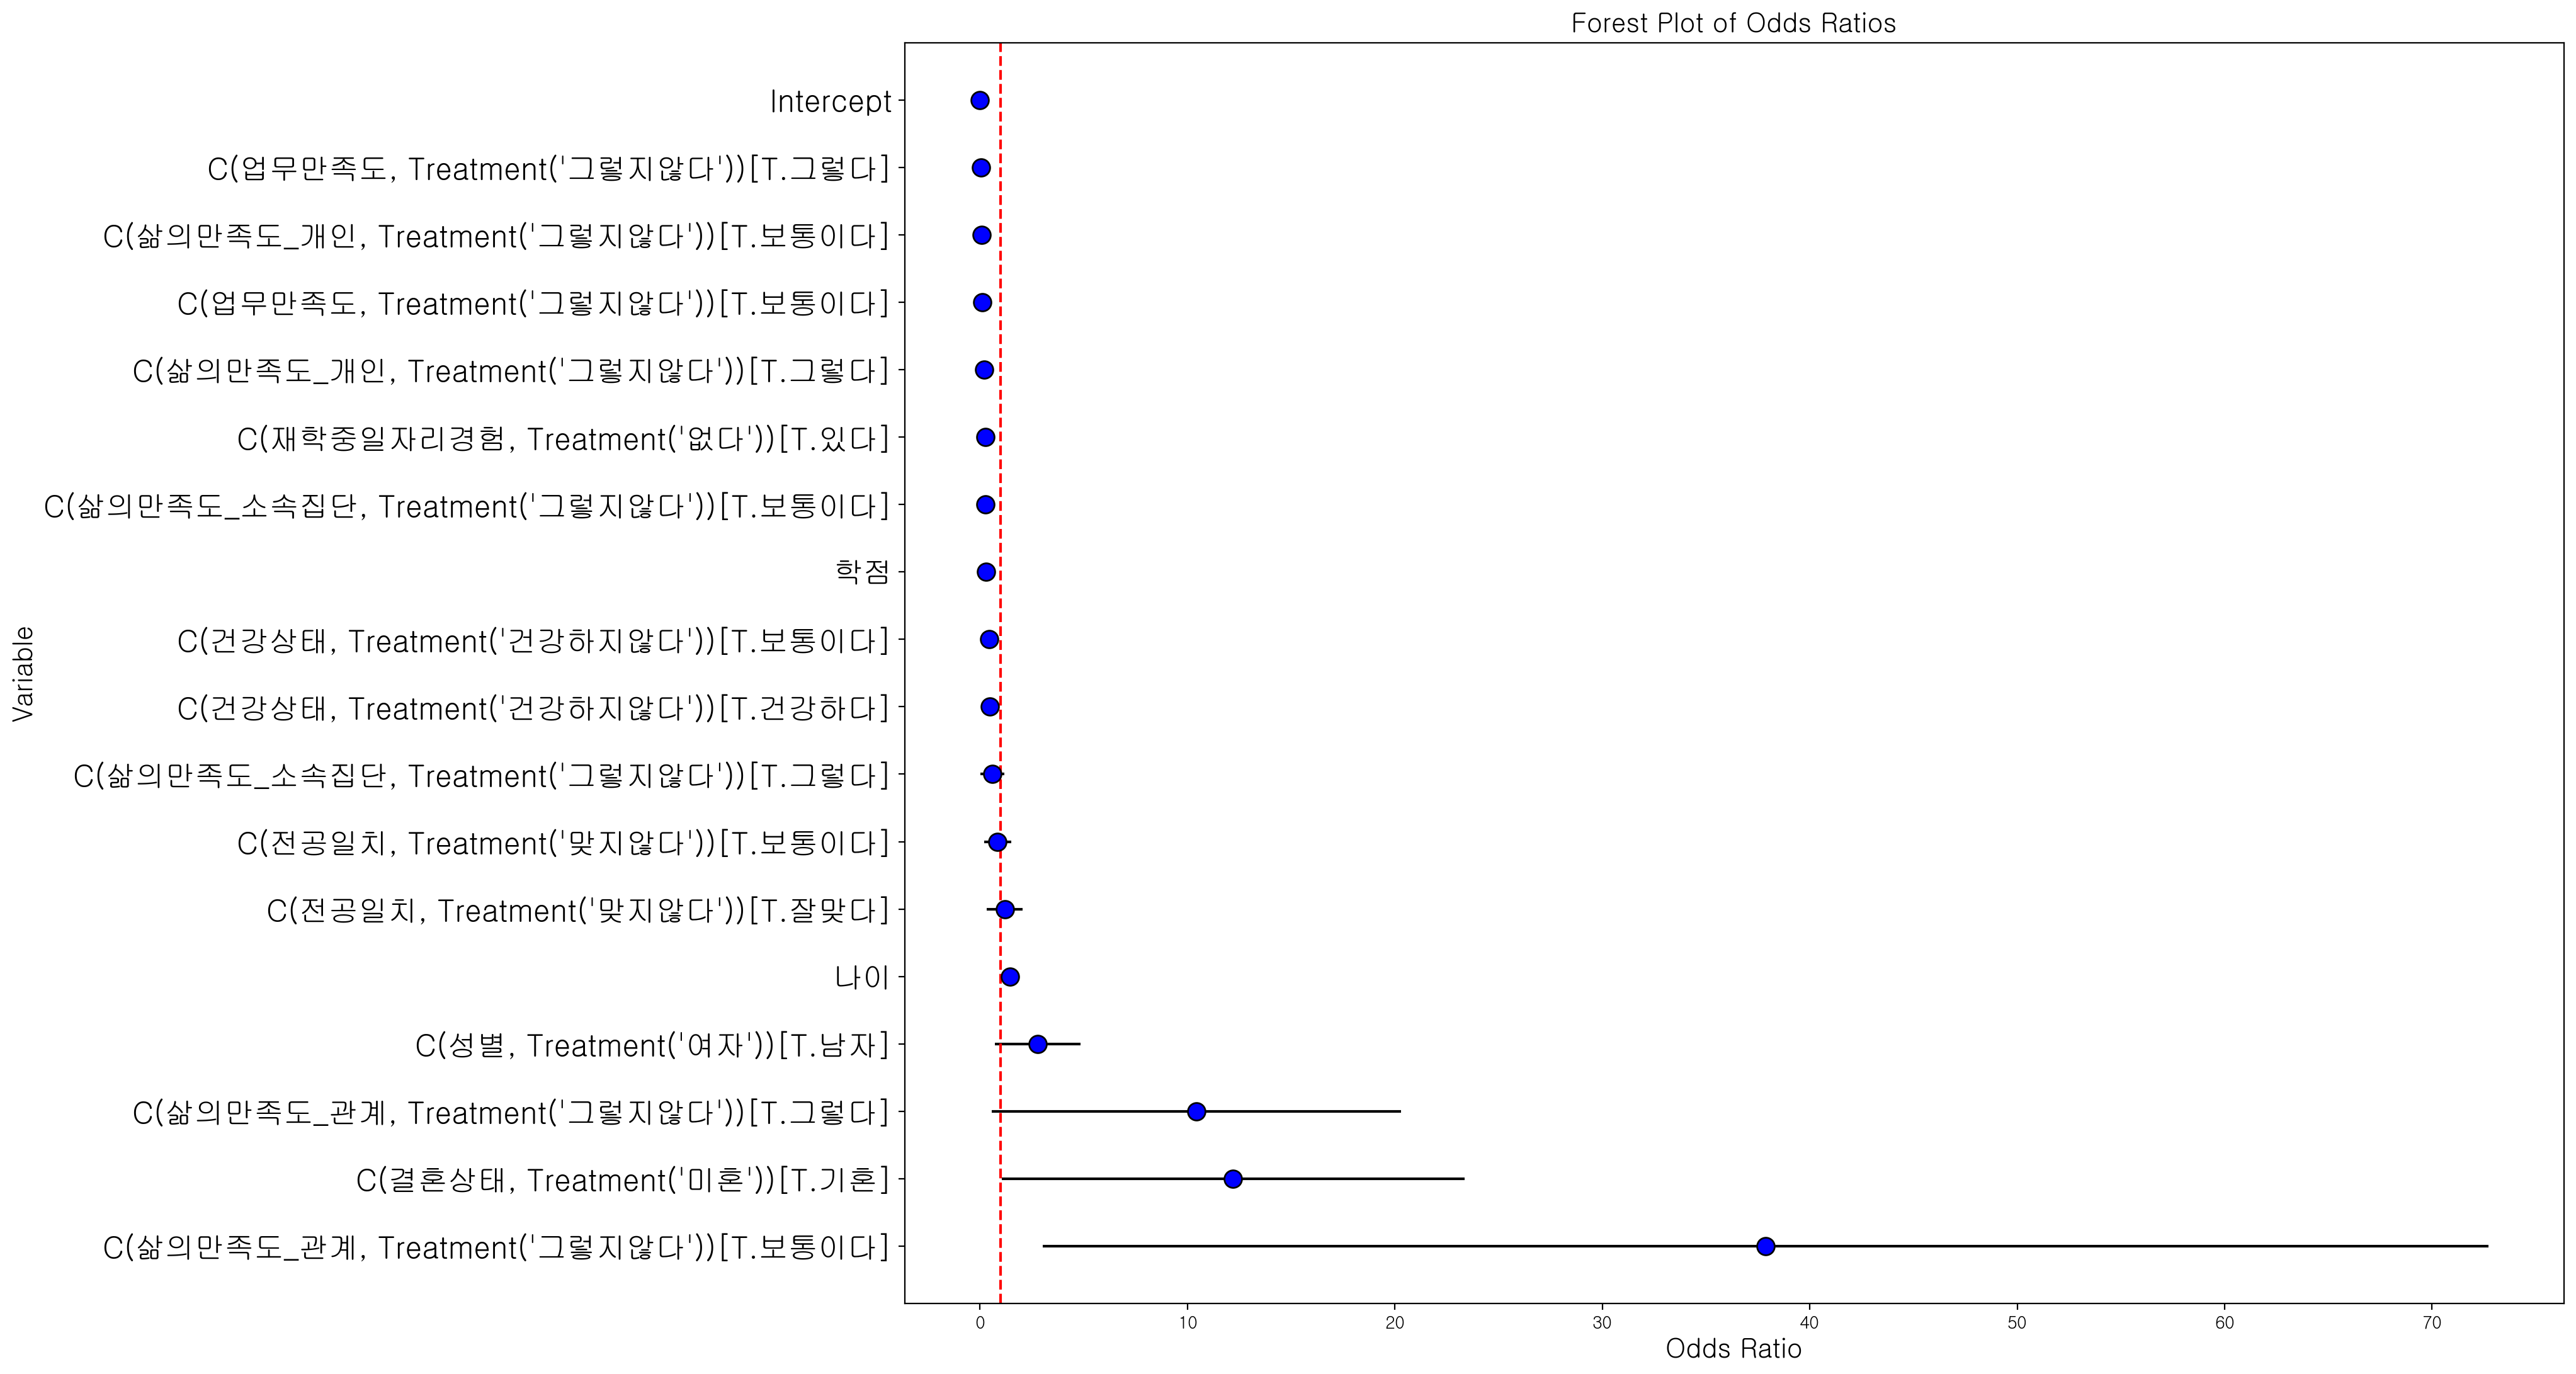

In [21]:
# 오즈비 순서대로 

# Define the data
data = [(var, odds_ratios.loc[var, "OR"], odds_ratios.loc[var, "Lower CI"], odds_ratios.loc[var, "Upper CI"]) for var in odds_ratios.index]

# Sort the data by the odds ratio
data = sorted(data, key=lambda x: x[1], reverse=True)

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='o', color='black', 
             markersize=10, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variable', fontsize=15)
plt.title('Forest Plot of Odds Ratios', fontsize=15)

# Show the plot
plt.show()

In [24]:
import forestplot as fp

In [34]:
odds_ratios

,OR,Lower CI,Upper CI
Intercept,0.00050,0.00000,0.56079
"C(성별, Treatment('여자'))[T.남자]",2.77720,0.71180,10.83563
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",0.46139,0.05488,3.87893
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",0.43069,0.05171,3.58705
"C(결혼상태, Treatment('미혼'))[T.기혼]",12.20375,1.04129,143.02563
"C(전공일치, Treatment('맞지않다'))[T.보통이다]",0.84344,0.19141,3.71656
"C(전공일치, Treatment('맞지않다'))[T.잘맞다]",1.18854,0.33019,4.27821
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.25821,0.08283,0.80495
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",0.20247,0.00557,7.36134
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]",0.06981,0.00555,0.87858


In [40]:
odds_ratios.reset_index(inplace=True)  # Reset the index to move the variable names to a column
varlabel = odds_ratios['index'] 

In [46]:
fp.forestplot(odds_ratios,  # the dataframe with results data
              estimate="OR",  # col containing estimated effect size 
              ll="Lower CI",  # column containing conf. int. lower limit
              hl="Upper CI",  # column containing conf. int. upper limit
                # column containing variable label
              ylabel="Odds Ratio",  # y-label title
              xlabel="Variables",  # x-label title
              )


TypeError: forestplot() missing 1 required positional argument: 'varlabel'